In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from kuramoto import *
from utils import * 


Bad key "text.kerning_factor" on line 4 in
/Users/yutingli/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


## Simulate for various parameters and collect the data

In [9]:
# Set up model parameters 
epsilon = 1
gamma = 0
sigma = 0.15
mean_omega = 0.3

# Set up simulation parameters 
L = 256 # size of the system 
T = 1e3 # total time of the simulation 
dt = 1e-2 # time step 
n_batches = T # number of time points recorded in the end 
N = 5

# Breakpoints for phases 
breakpoints = [x*2*np.pi for x in [0.47, 0.67]]

# Initialise the model and run the simulation 

lengths_samples = [] 
variables = [0.1, 0.2, 1]
data = [] 
for gamma in variables:
    datasets = [] 
    data.append(datasets)
    for n in range(N):
        model = Kuramoto(epsilon, gamma, sigma, mean_omega, BC='fixed')
        model.initialise(L, T, dt, n_batches)
        model.evolve(verbose=False)
        datasets.append(collect_dataset(model.res[-2] % 2*np.pi, breakpoints))  

## Find the defects and collect lengths w and w/o defects 

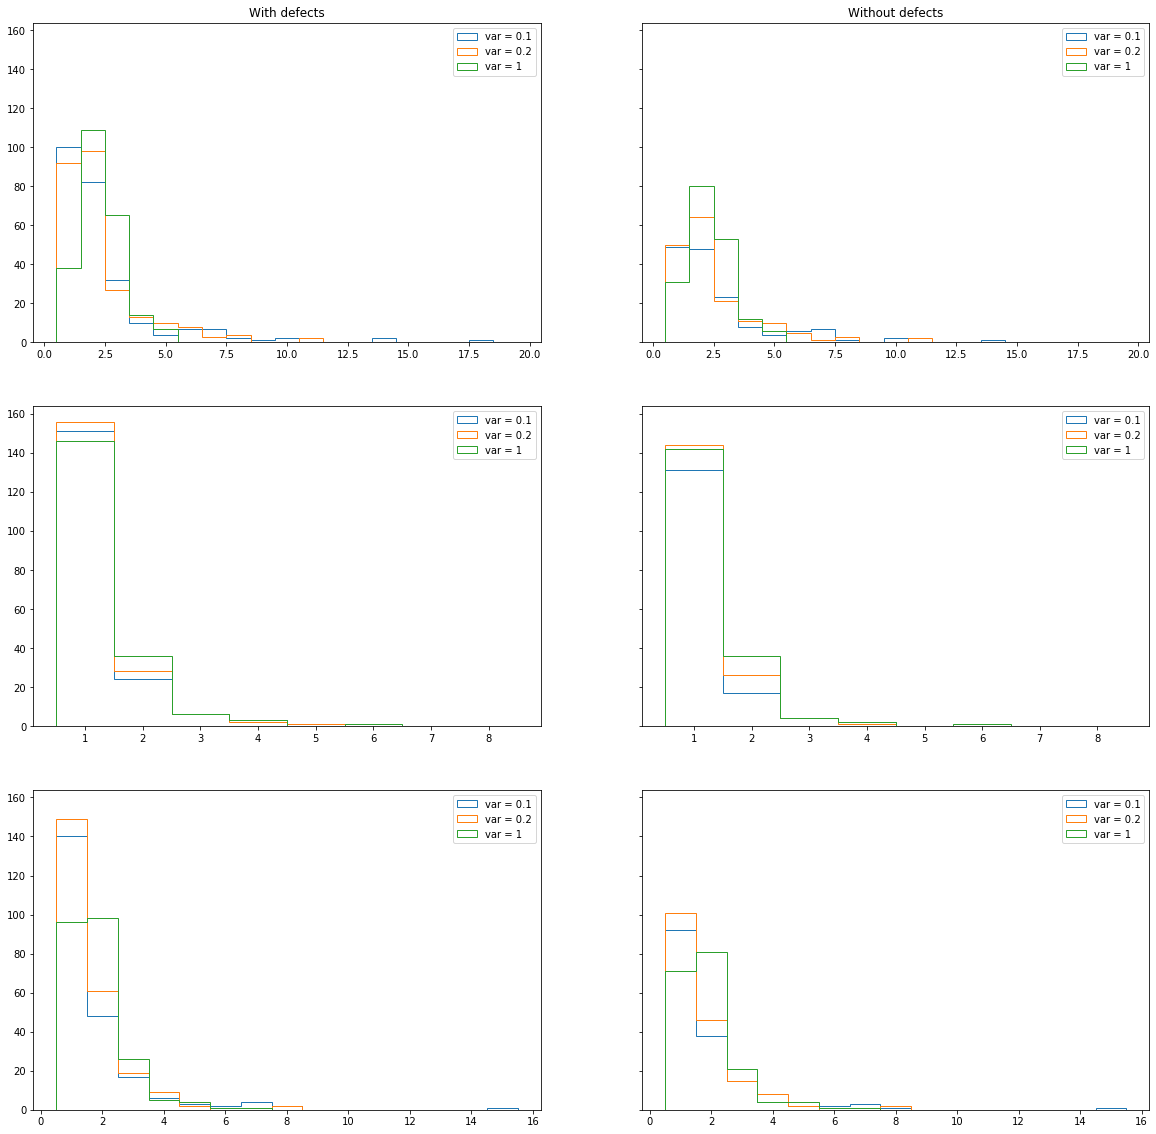

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=3, sharey=True, figsize=(20, 20))

for (j, datasets) in enumerate(data): 
    find_defects(datasets) 
    lengths, lengths_wo_defects = find_lengths(datasets) 
        
    for i in range(3): 
        m = 1
        lengths[i] = np.array(lengths[i])/m
        lengths_wo_defects[i] = np.array(lengths_wo_defects[i])/m
        bins = np.arange(max(lengths[i]))+0.5
        axes[i, 0].hist(lengths[i], log=False, histtype='step', bins=bins, label='var = {}'.format(variables[j]))
        axes[i, 1].hist(lengths_wo_defects[i], log=False, histtype='step', bins=bins, label='var = {}'.format(variables[j]))
    

for i in range(3): 
    for j in range(2): 
        axes[i, j].legend() 

axes[0, 0].set_title('With defects')
axes[0, 1].set_title('Without defects')

plt.show() 